In [853]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


# Clean Crime Data

- First, I'll bring in the raw data file for 2020 Louisville Crime data so that I can see what I'm working with. I'll assign it to variable df20 so that it can be more easily managed.

In [854]:
df20 = pd.read_csv('assets/Louisville_Metro_KY_-_Crime_Data_2020.csv', low_memory=False)

- Let's check the dataframe to see what we're working with.

In [855]:
df20.head(3)

,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,CRIME_TYPE,UOR_DESC,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,City,ZIP_CODE,ObjectId
0,80-20-000117,2020/01/01 13:50:00,2019/12/31 03:30:00,FRAUD,FRAUD USE OF CREDIT CARD AFTER REPT LOST/STOLE...,26B,PART II,COMPLETED,4TH DIVISION,435,SERVICE / GAS STATION,4100 BLOCK TAYLOR BLVD ...,LOUISVILLE,40215,1
1,80-20-000292,2020/01/02 10:45:00,2019/12/31 18:00:00,THEFT/LARCENY,"TBUT OR DISP ALL OTHERS > $500 BUT < $10,000",23H,PART I,COMPLETED,6TH DIVISION,613,NON-ATTACHED RESD GARAGE/SHED/BULD,5200 BLOCK RUSSETT BLVD ...,LOUISVILLE,40218,2
2,80-19-096135,2020/01/01 00:26:00,2019/12/31 23:30:00,VEHICLE BREAK-IN/THEFT,TBUT OR DISP CONTENTS FROM VEH $500 OR > BUT <...,23F,PART I,COMPLETED,1ST DIVISION,112,HIGHWAY / ROAD / ALLEY,S 16TH ST / W CHESTNUT ST ...,LOUISVILLE,40203,3


- Isolate the columns so that we can drop those that are unnecessary for the analysis.

In [856]:
df20.columns

Index(['INCIDENT_NUMBER', 'DATE_REPORTED', 'DATE_OCCURED', 'CRIME_TYPE',
       'UOR_DESC', 'NIBRS_CODE', 'UCR_HIERARCHY', 'ATT_COMP', 'LMPD_DIVISION',
       'LMPD_BEAT', 'PREMISE_TYPE', 'BLOCK_ADDRESS', 'City', 'ZIP_CODE',
       'ObjectId'],
      dtype='object')

- Collect all unneccesary colums into a variable.

In [857]:
dropped_columns = ['INCIDENT_NUMBER','UOR_DESC', 'NIBRS_CODE', 'UCR_HIERARCHY', 'ATT_COMP','LMPD_DIVISION', 'ObjectId', 'LMPD_BEAT','PREMISE_TYPE', 'BLOCK_ADDRESS', 'City', 'ZIP_CODE', 'DATE_OCCURED']

- For the purposes of my analysis, I'm going to discard any columns that have no discernible effect on the data to be analyzed. To save these changes to the original dataset I'll use the inplace= True parameter. Using the dropped_columns variable, I'll neatly drop the columns I don't need.

In [858]:
df20.drop(columns= dropped_columns,inplace= True)


- Here, I'm calling the .head function again in order to make sure that the previous function call executed correctly.

In [859]:
df20.head(1)

,DATE_REPORTED,CRIME_TYPE
0,2020/01/01 13:50:00,FRAUD


In [860]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70233 entries, 0 to 70232
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DATE_REPORTED  70233 non-null  object
 1   CRIME_TYPE     70233 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


- Let's clean the dataframe up a bit more.

In [861]:
# Let's rename and reformat these columns.
df20.rename(columns={'DATE_REPORTED': 'date', 'CRIME_TYPE': 'crime'},inplace=True)

In [862]:
# Convert the date column to datetime and simplify dates to month/year format. Changing date/time settings: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
df20['date']= df20['date'].astype('datetime64[ns]')

# Check work
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70233 entries, 0 to 70232
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    70233 non-null  datetime64[ns]
 1   crime   70233 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.1+ MB


In [863]:
# Drop rows with null values.
df20= df20.dropna()
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70233 entries, 0 to 70232
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    70233 non-null  datetime64[ns]
 1   crime   70233 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.1+ MB


In [864]:
# Add a running count of crime types in a new column to help represent crime types numerically over time.
df20['crime_totals'] = df20.groupby('crime').cumcount() + 1
df20


,date,crime,crime_totals
0,2020-01-01 13:50:00,FRAUD,1
1,2020-01-02 10:45:00,THEFT/LARCENY,1
2,2020-01-01 00:26:00,VEHICLE BREAK-IN/THEFT,1
3,2020-01-01 23:57:00,VANDALISM,1
4,2020-01-02 11:02:00,VEHICLE BREAK-IN/THEFT,2
...,...,...,...
70228,2020-12-31 16:09:00,VEHICLE BREAK-IN/THEFT,6770
70229,2020-12-31 15:38:00,ASSAULT,15948
70230,2020-12-31 16:25:00,VEHICLE BREAK-IN/THEFT,6771
70231,2020-12-31 15:39:00,ASSAULT,15949


# Clean Louisville, KY Covid-19 Data

In [865]:
# Read in covid-19 data.
covid= pd.read_csv('assets/US_KY_21111.csv')
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Columns: 450 entries, location_key to relative_humidity
dtypes: float64(422), int64(16), object(12)
memory usage: 3.4+ MB


In [866]:
# Use list() to print entire columns list to screen. Without it, the columns are truncated. Copy the columns that need to be dropped.
list(covid.columns)


['location_key',
 'date',
 'place_id',
 'wikidata_id',
 'datacommons_id',
 'country_code',
 'country_name',
 'subregion1_code',
 'subregion1_name',
 'subregion2_code',
 'subregion2_name',
 'iso_3166_1_alpha_2',
 'iso_3166_1_alpha_3',
 'aggregation_level',
 'new_confirmed',
 'new_deceased',
 'cumulative_confirmed',
 'cumulative_deceased',
 'new_persons_fully_vaccinated',
 'cumulative_persons_fully_vaccinated',
 'population',
 'population_male',
 'population_female',
 'population_age_00_09',
 'population_age_10_19',
 'population_age_20_29',
 'population_age_30_39',
 'population_age_40_49',
 'population_age_50_59',
 'population_age_60_69',
 'population_age_70_79',
 'population_age_80_and_older',
 'openstreetmap_id',
 'latitude',
 'longitude',
 'area_sq_km',
 'life_expectancy',
 'mobility_retail_and_recreation',
 'mobility_grocery_and_pharmacy',
 'mobility_parks',
 'mobility_transit_stations',
 'mobility_workplaces',
 'mobility_residential',
 'search_trends_abdominal_obesity',
 'search_tre

In [867]:
# Assign columns to be dropped to a variable
dropped_columns = [
    'location_key', 
    'subregion1_name',
    'subregion2_name',
    'place_id',
    'wikidata_id',
    'datacommons_id',
    'country_code',
    'country_name',
    'subregion1_code',
    'subregion2_code',
    'iso_3166_1_alpha_2',
    'iso_3166_1_alpha_3',
    'aggregation_level',
    'new_deceased',
    'cumulative_deceased',
    'new_persons_fully_vaccinated',
    'cumulative_persons_fully_vaccinated',
    'openstreetmap_id',
    'latitude',
    'longitude',
    'area_sq_km',
    'mobility_retail_and_recreation',
    'mobility_grocery_and_pharmacy',
    'mobility_parks',
    'mobility_transit_stations',
    'mobility_workplaces',
    'mobility_residential',
    'search_trends_abdominal_obesity',
    'search_trends_abdominal_pain',
    'search_trends_acne',
    'search_trends_actinic_keratosis',
    'search_trends_acute_bronchitis',
    'search_trends_adrenal_crisis',
    'search_trends_ageusia',
    'search_trends_alcoholism',
    'search_trends_allergy',
    'search_trends_amblyopia',
    'search_trends_amenorrhea',
    'search_trends_amnesia',
    'search_trends_anal_fissure',
    'search_trends_anaphylaxis',
    'search_trends_anemia',
    'search_trends_angina_pectoris',
    'search_trends_angioedema',
    'search_trends_anosmia',
    'search_trends_anxiety',
    'search_trends_aphasia',
    'search_trends_apnea',
    'search_trends_arthralgia',
    'search_trends_arthritis',
    'search_trends_ascites',
    'search_trends_asperger_syndrome',
    'search_trends_asphyxia',
    'search_trends_asthma',
    'search_trends_astigmatism',
    'search_trends_ataxia',
    'search_trends_atheroma',
    'search_trends_attention_deficit_hyperactivity_disorder',
    'search_trends_autoimmune_disease',
    'search_trends_avoidant_personality_disorder',
    'search_trends_back_pain',
    'search_trends_bacterial_vaginosis',
    'search_trends_balance_disorder',
    'search_trends_beaus_lines',
    'search_trends_bells_palsy',
    'search_trends_biliary_colic',
    'search_trends_binge_eating',
    'search_trends_bleeding',
    'search_trends_bleeding_on_probing',
    'search_trends_blepharospasm',
    'search_trends_bloating',
    'search_trends_blood_in_stool',
    'search_trends_blurred_vision',
    'search_trends_blushing',
    'search_trends_boil',
    'search_trends_bone_fracture',
    'search_trends_bone_tumor',
    'search_trends_bowel_obstruction',
    'search_trends_bradycardia',
    'search_trends_braxton_hicks_contractions',
    'search_trends_breakthrough_bleeding',
    'search_trends_breast_pain',
    'search_trends_bronchitis',
    'search_trends_bruise',
    'search_trends_bruxism',
    'search_trends_bunion',
    'search_trends_burn',
    'search_trends_burning_mouth_syndrome',
    'search_trends_candidiasis',
    'search_trends_canker_sore',
    'search_trends_cardiac_arrest',
    'search_trends_carpal_tunnel_syndrome',
    'search_trends_cataplexy',
    'search_trends_cataract',
    'search_trends_chancre',
    'search_trends_cheilitis',
    'search_trends_chest_pain',
    'search_trends_chills',
    'search_trends_chorea',
    'search_trends_chronic_pain',
    'search_trends_cirrhosis',
    'search_trends_cleft_lip_and_cleft_palate',
    'search_trends_clouding_of_consciousness',
    'search_trends_cluster_headache',
    'search_trends_colitis',
    'search_trends_coma',
    'search_trends_common_cold',
    'search_trends_compulsive_behavior',
    'search_trends_compulsive_hoarding',
    'search_trends_confusion',
    'search_trends_congenital_heart_defect',
    'search_trends_conjunctivitis',
    'search_trends_constipation',
    'search_trends_convulsion',
    'search_trends_cough',
    'search_trends_cramp',
    'search_trends_crepitus',
    'search_trends_croup',
    'search_trends_cyanosis',
    'search_trends_dandruff',
    'search_trends_delayed_onset_muscle_soreness',
    'search_trends_dementia',
    'search_trends_dentin_hypersensitivity',
    'search_trends_depersonalization',
    'search_trends_depression',
    'search_trends_dermatitis',
    'search_trends_desquamation',
    'search_trends_developmental_disability',
    'search_trends_diabetes',
    'search_trends_diabetic_ketoacidosis',
    'search_trends_diarrhea',
    'search_trends_dizziness',
    'search_trends_dry_eye_syndrome',
    'search_trends_dysgeusia',
    'search_trends_dysmenorrhea',
    'search_trends_dyspareunia',
    'search_trends_dysphagia',
    'search_trends_dysphoria',
    'search_trends_dystonia',
    'search_trends_dysuria',
    'search_trends_ear_pain',
    'search_trends_eczema',
    'search_trends_edema',
    'search_trends_encephalitis',
    'search_trends_encephalopathy',
    'search_trends_epidermoid_cyst',
    'search_trends_epilepsy',
    'search_trends_epiphora',
    'search_trends_erectile_dysfunction',
    'search_trends_erythema',
    'search_trends_erythema_chronicum_migrans',
    'search_trends_esophagitis',
    'search_trends_excessive_daytime_sleepiness',
    'search_trends_eye_pain',
    'search_trends_eye_strain',
    'search_trends_facial_nerve_paralysis',
    'search_trends_facial_swelling',
    'search_trends_fasciculation',
    'search_trends_fatigue',
    'search_trends_fatty_liver_disease',
    'search_trends_fecal_incontinence',
    'search_trends_fever',
    'search_trends_fibrillation',
    'search_trends_fibrocystic_breast_changes',
    'search_trends_fibromyalgia',
    'search_trends_flatulence',
    'search_trends_floater',
    'search_trends_focal_seizure',
    'search_trends_folate_deficiency',
    'search_trends_food_craving',
    'search_trends_food_intolerance',
    'search_trends_frequent_urination',
    'search_trends_gastroesophageal_reflux_disease',
    'search_trends_gastroparesis',
    'search_trends_generalized_anxiety_disorder',
    'search_trends_genital_wart',
    'search_trends_gingival_recession',
    'search_trends_gingivitis',
    'search_trends_globus_pharyngis',
    'search_trends_goitre',
    'search_trends_gout',
    'search_trends_grandiosity',
    'search_trends_granuloma',
    'search_trends_guilt',
    'search_trends_hair_loss',
    'search_trends_halitosis',
    'search_trends_hay_fever',
    'search_trends_headache',
    'search_trends_heart_arrhythmia',
    'search_trends_heart_murmur',
    'search_trends_heartburn',
    'search_trends_hematochezia',
    'search_trends_hematoma',
    'search_trends_hematuria',
    'search_trends_hemoptysis',
    'search_trends_hemorrhoids',
    'search_trends_hepatitis',
    'search_trends_hepatotoxicity',
    'search_trends_hiccup',
    'search_trends_hip_pain',
    'search_trends_hives',
    'search_trends_hot_flash',
    'search_trends_hydrocephalus',
    'search_trends_hypercalcaemia',
    'search_trends_hypercholesterolemia',
    'search_trends_hyperemesis_gravidarum',
    'search_trends_hyperglycemia',
    'search_trends_hyperhidrosis',
    'search_trends_hyperkalemia',
    'search_trends_hyperlipidemia',
    'search_trends_hypermobility',
    'search_trends_hyperpigmentation',
    'search_trends_hypersomnia',
    'search_trends_hypertension',
    'search_trends_hyperthermia',
    'search_trends_hyperthyroidism',
    'search_trends_hypertriglyceridemia',
    'search_trends_hypertrophy',
    'search_trends_hyperventilation',
    'search_trends_hypocalcaemia',
    'search_trends_hypochondriasis',
    'search_trends_hypoglycemia',
    'search_trends_hypogonadism',
    'search_trends_hypokalemia',
    'search_trends_hypomania',
    'search_trends_hyponatremia',
    'search_trends_hypotension',
    'search_trends_hypothyroidism',
    'search_trends_hypoxemia',
    'search_trends_hypoxia',
    'search_trends_impetigo',
    'search_trends_implantation_bleeding',
    'search_trends_impulsivity',
    'search_trends_indigestion',
    'search_trends_infection',
    'search_trends_inflammation',
    'search_trends_inflammatory_bowel_disease',
    'search_trends_ingrown_hair',
    'search_trends_insomnia',
    'search_trends_insulin_resistance',
    'search_trends_intermenstrual_bleeding',
    'search_trends_intracranial_pressure',
    'search_trends_iron_deficiency',
    'search_trends_irregular_menstruation',
    'search_trends_itch',
    'search_trends_jaundice',
    'search_trends_kidney_failure',
    'search_trends_kidney_stone',
    'search_trends_knee_pain',
    'search_trends_kyphosis',
    'search_trends_lactose_intolerance',
    'search_trends_leg_cramps',
    'search_trends_lesion',
    'search_trends_leukorrhea',
    'search_trends_lightheadedness',
    'search_trends_low_back_pain',
    'search_trends_low_grade_fever',
    'search_trends_lymphedema',
    'search_trends_major_depressive_disorder',
    'search_trends_malabsorption',
    'search_trends_male_infertility',
    'search_trends_manic_disorder',
    'search_trends_melasma',
    'search_trends_melena',
    'search_trends_meningitis',
    'search_trends_menorrhagia',
    'search_trends_middle_back_pain',
    'search_trends_migraine',
    'search_trends_milium',
    'search_trends_mitral_insufficiency',
    'search_trends_mood_disorder',
    'search_trends_mood_swing',
    'search_trends_morning_sickness',
    'search_trends_motion_sickness',
    'search_trends_mouth_ulcer',
    'search_trends_muscle_atrophy',
    'search_trends_muscle_weakness',
    'search_trends_myalgia',
    'search_trends_mydriasis',
    'search_trends_myocardial_infarction',
    'search_trends_nasal_congestion',
    'search_trends_nausea',
    'search_trends_neck_mass',
    'search_trends_neck_pain',
    'search_trends_neonatal_jaundice',
    'search_trends_nerve_injury',
    'search_trends_neuralgia',
    'search_trends_neutropenia',
    'search_trends_night_sweats',
    'search_trends_night_terror',
    'search_trends_nocturnal_enuresis',
    'search_trends_nodule',
    'search_trends_nosebleed',
    'search_trends_nystagmus',
    'search_trends_obesity',
    'search_trends_onychorrhexis',
    'search_trends_oral_candidiasis',
    'search_trends_orthostatic_hypotension',
    'search_trends_osteopenia',
    'search_trends_osteophyte',
    'search_trends_osteoporosis',
    'search_trends_otitis',
    'search_trends_otitis_externa',
    'search_trends_otitis_media',
    'search_trends_pain',
    'search_trends_palpitations',
    'search_trends_pancreatitis',
    'search_trends_panic_attack',
    'search_trends_papule',
    'search_trends_paranoia',
    'search_trends_paresthesia',
    'search_trends_pelvic_inflammatory_disease',
    'search_trends_pericarditis',
    'search_trends_periodontal_disease',
    'search_trends_periorbital_puffiness',
    'search_trends_peripheral_neuropathy',
    'search_trends_perspiration',
    'search_trends_petechia',
    'search_trends_phlegm',
    'search_trends_photophobia',
    'search_trends_photopsia',
    'search_trends_pleural_effusion',
    'search_trends_pleurisy',
    'search_trends_pneumonia',
    'search_trends_podalgia',
    'search_trends_polycythemia',
    'search_trends_polyneuropathy',
    'search_trends_polyuria',
    'search_trends_poor_posture',
    'search_trends_post_nasal_drip',
    'search_trends_postural_orthostatic_tachycardia_syndrome',
    'search_trends_prediabetes',
    'search_trends_proteinuria',
    'search_trends_pruritus_ani',
    'search_trends_psychosis',
    'search_trends_ptosis',
    'search_trends_pulmonary_edema',
    'search_trends_pulmonary_hypertension',
    'search_trends_purpura',
    'search_trends_pus',
    'search_trends_pyelonephritis',
    'search_trends_radiculopathy',
    'search_trends_rectal_prolapse',
    'search_trends_red_eye',
    'search_trends_renal_colic',
    'search_trends_restless_legs_syndrome',
    'search_trends_rheum',
    'search_trends_rhinitis',
    'search_trends_rhinorrhea',
    'search_trends_rosacea',
    'search_trends_round_ligament_pain',
    'search_trends_rumination',
    'search_trends_scar',
    'search_trends_sciatica',
    'search_trends_scoliosis',
    'search_trends_seborrheic_dermatitis',
    'search_trends_self_harm',
    'search_trends_sensitivity_to_sound',
    'search_trends_sexual_dysfunction',
    'search_trends_sharp_pain',
    'search_trends_shivering',
    'search_trends_shortness_of_breath',
    'search_trends_shyness',
    'search_trends_sinusitis',
    'search_trends_skin_condition',
    'search_trends_skin_rash',
    'search_trends_skin_tag',
    'search_trends_skin_ulcer',
    'search_trends_sleep_apnea',
    'search_trends_sleep_deprivation',
    'search_trends_sleep_disorder',
    'search_trends_snoring',
    'search_trends_sore_throat',
    'search_trends_spasticity',
    'search_trends_splenomegaly',
    'search_trends_sputum',
    'search_trends_stomach_rumble',
    'search_trends_strabismus',
    'search_trends_stretch_marks',
    'search_trends_stroke',
    'search_trends_stuttering',
    'search_trends_subdural_hematoma',
    'search_trends_suicidal_ideation',
    'search_trends_swelling',
    'search_trends_swollen_feet',
    'search_trends_swollen_lymph_nodes',
    'search_trends_syncope',
    'search_trends_tachycardia',
    'search_trends_tachypnea',
    'search_trends_telangiectasia',
    'search_trends_tenderness',
    'search_trends_testicular_pain',
    'search_trends_throat_irritation',
    'search_trends_thrombocytopenia',
    'search_trends_thyroid_nodule',
    'search_trends_tic',
    'search_trends_tinnitus',
    'search_trends_tonsillitis',
    'search_trends_toothache',
    'search_trends_tremor',
    'search_trends_trichoptilosis',
    'search_trends_tumor',
    'search_trends_type_2_diabetes',
    'search_trends_unconsciousness',
    'search_trends_underweight',
    'search_trends_upper_respiratory_tract_infection',
    'search_trends_urethritis',
    'search_trends_urinary_incontinence',
    'search_trends_urinary_tract_infection',
    'search_trends_uterine_contraction',
    'search_trends_vaginal_bleeding',
    'search_trends_vaginal_discharge',
    'search_trends_vaginitis',
    'search_trends_varicose_veins',
    'search_trends_vasculitis',
    'search_trends_ventricular_tachycardia',
    'search_trends_vertigo',
    'search_trends_visual_acuity',
    'search_trends_vomiting',
    'search_trends_wart',
    'search_trends_water_retention',
    'search_trends_weakness',
    'search_trends_weight_gain',
    'search_trends_wheeze',
    'search_trends_xeroderma',
    'search_trends_xerostomia',
    'search_trends_yawn',
    'average_temperature_celsius',
    'minimum_temperature_celsius',
    'maximum_temperature_celsius',
    'rainfall_mm',
    'snowfall_mm',
    'dew_point',
    'relative_humidity']

In [868]:
# Drop unnecessary columns
covid.drop(columns= dropped_columns, inplace=True)

# Check dataframe
covid.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         991 non-null    object 
 1   new_confirmed                796 non-null    float64
 2   cumulative_confirmed         797 non-null    float64
 3   population                   991 non-null    int64  
 4   population_male              991 non-null    int64  
 5   population_female            991 non-null    int64  
 6   population_age_00_09         991 non-null    int64  
 7   population_age_10_19         991 non-null    int64  
 8   population_age_20_29         991 non-null    int64  
 9   population_age_30_39         991 non-null    int64  
 10  population_age_40_49         991 non-null    int64  
 11  population_age_50_59         991 non-null    int64  
 12  population_age_60_69         991 non-null    int64  
 13  population_age_70_79

In [869]:
# Rename columns for clarity
covid.rename(columns={'population':'total_population'}, inplace=True)

# Check work
covid.head(3)

,date,new_confirmed,cumulative_confirmed,total_population,population_male,population_female,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older,life_expectancy
0,2020-01-01,NaN,NaN,769828,372253,397575,95970,93544,108926,104213,93095,103881,91239,49192,29768,76.061538
1,2020-01-02,NaN,NaN,769828,372253,397575,95970,93544,108926,104213,93095,103881,91239,49192,29768,76.061538
2,2020-01-03,NaN,NaN,769828,372253,397575,95970,93544,108926,104213,93095,103881,91239,49192,29768,76.061538


In [870]:
# All population-related data shows no change over time across the data set so I will actually go ahead and drop those columns as well.
covid = covid.drop(columns=['total_population',
 'population_male',
 'population_female',
 'population_age_00_09',
 'population_age_10_19',
 'population_age_20_29',
 'population_age_30_39',
 'population_age_40_49',
 'population_age_50_59',
 'population_age_60_69',
 'population_age_70_79',
 'population_age_80_and_older',
 'life_expectancy'])

# Check work
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  991 non-null    object 
 1   new_confirmed         796 non-null    float64
 2   cumulative_confirmed  797 non-null    float64
dtypes: float64(2), object(1)
memory usage: 23.4+ KB


In [871]:
# Convert dates to datetime
covid['date'] = covid['date'].astype('datetime64[ns]')

# Check dataframe
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  991 non-null    datetime64[ns]
 1   new_confirmed         796 non-null    float64       
 2   cumulative_confirmed  797 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 23.4 KB


In [872]:
# We're only focusing on data from 2020 so let's filter this data frame to display only data within that year.
start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2021-12-31')

covid = covid[(covid['date'] >= start_date) & (covid['date'] <= end_date)]
covid


,date,new_confirmed,cumulative_confirmed
0,2020-01-01,NaN,NaN
1,2020-01-02,NaN,NaN
2,2020-01-03,NaN,NaN
3,2020-01-04,NaN,NaN
4,2020-01-05,NaN,NaN
...,...,...,...
726,2021-12-27,1621.0,135643.0
727,2021-12-28,1205.0,136848.0
728,2021-12-29,1558.0,138406.0
729,2021-12-30,1084.0,139490.0


# Merge Covid and Crime

In [873]:
# Perform outer join using the .merge() function. We'll join on the date columns of each data frame. It was very important that I ensured they were cleaned beforehand so that the merge could happen as seamlessly as possible.
combined = pd.merge(covid, df20, how='outer', on='date')
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70938 entries, 0 to 70937
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  70938 non-null  datetime64[ns]
 1   new_confirmed         675 non-null    float64       
 2   cumulative_confirmed  676 non-null    float64       
 3   crime                 70233 non-null  object        
 4   crime_totals          70233 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 3.2+ MB


In [874]:
# Create a simplified date column in Month/Year format. This, unfortunately creates a date column with an object date type so we'll keep the original date column in the data frame.
combined['month_year'] = combined['date'].dt.strftime('%B %Y')

In [875]:
# Display columns in order to reorder them in final combined data frame.
combined.columns

Index(['date', 'new_confirmed', 'cumulative_confirmed', 'crime',
       'crime_totals', 'month_year'],
      dtype='object')

In [876]:
# Assign reordered columns to a new variable.
reordered_df= ['date', 'month_year', 'new_confirmed', 'cumulative_confirmed', 'crime', 'crime_totals' ]
# Assign original df to newly created reordered df.
combined= combined[reordered_df]
combined


,date,month_year,new_confirmed,cumulative_confirmed,crime,crime_totals
0,2020-01-01 00:00:00,January 2020,NaN,NaN,NaN,NaN
1,2020-01-02 00:00:00,January 2020,NaN,NaN,NaN,NaN
2,2020-01-03 00:00:00,January 2020,NaN,NaN,NaN,NaN
3,2020-01-04 00:00:00,January 2020,NaN,NaN,NaN,NaN
4,2020-01-05 00:00:00,January 2020,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
70933,2020-12-31 16:07:00,December 2020,NaN,NaN,VANDALISM,6215.0
70934,2020-12-31 16:09:00,December 2020,NaN,NaN,VEHICLE BREAK-IN/THEFT,6770.0
70935,2020-12-31 15:38:00,December 2020,NaN,NaN,ASSAULT,15948.0
70936,2020-12-31 16:25:00,December 2020,NaN,NaN,VEHICLE BREAK-IN/THEFT,6771.0


In [877]:
# Sort data frame by date
combined= combined.sort_values(by=['date'])
combined

,date,month_year,new_confirmed,cumulative_confirmed,crime,crime_totals
0,2020-01-01 00:00:00,January 2020,NaN,NaN,NaN,NaN
749,2020-01-01 00:13:00,January 2020,NaN,NaN,ASSAULT,1.0
750,2020-01-01 00:13:00,January 2020,NaN,NaN,DISTURBING THE PEACE,1.0
746,2020-01-01 00:26:00,January 2020,NaN,NaN,VEHICLE BREAK-IN/THEFT,1.0
778,2020-01-01 00:31:00,January 2020,NaN,NaN,VANDALISM,4.0
...,...,...,...,...,...,...
739,2021-12-27 00:00:00,December 2021,1621.0,135643.0,NaN,NaN
740,2021-12-28 00:00:00,December 2021,1205.0,136848.0,NaN,NaN
741,2021-12-29 00:00:00,December 2021,1558.0,138406.0,NaN,NaN
742,2021-12-30 00:00:00,December 2021,1084.0,139490.0,NaN,NaN


# Visualizations

### Fun with Pivot tables

In [878]:
# List all of the unique values within the month_year column that we created earlier.
list(combined['month_year'].unique())

['January 2020',
 'February 2020',
 'March 2020',
 'April 2020',
 'May 2020',
 'June 2020',
 'July 2020',
 'August 2020',
 'September 2020',
 'October 2020',
 'November 2020',
 'December 2020',
 'January 2021',
 'February 2021',
 'March 2021',
 'April 2021',
 'May 2021',
 'June 2021',
 'July 2021',
 'August 2021',
 'September 2021',
 'October 2021',
 'November 2021',
 'December 2021']

In [879]:
# Create a pivot_table focused on the crime utilizing the unique list created above.
pivot_table = pd.pivot_table(
    data=combined,
    values='crime_totals',
    index='crime',
    columns='month_year',
    aggfunc='count'
)
sorted_columns= ['January 2020',
 'February 2020',
 'March 2020',
 'April 2020',
 'May 2020',
 'June 2020',
 'July 2020',
 'August 2020',
 'September 2020',
 'October 2020',
 'November 2020',
 'December 2020',
]
pivot_table= pivot_table[sorted_columns]
pivot_table


month_year,January 2020,February 2020,March 2020,April 2020,May 2020,June 2020,July 2020,August 2020,September 2020,October 2020,November 2020,December 2020
crime,,,,,,,,,,,,
ARSON,13.0,10.0,8.0,9.0,23.0,27.0,16.0,13.0,15.0,15.0,11.0,12.0
ASSAULT,1062.0,1003.0,1222.0,1201.0,1440.0,1556.0,1530.0,1529.0,1366.0,1407.0,1317.0,1316.0
BURGLARY,306.0,285.0,356.0,376.0,359.0,484.0,488.0,488.0,540.0,528.0,414.0,387.0
DISTURBING THE PEACE,32.0,33.0,25.0,32.0,37.0,35.0,23.0,31.0,31.0,38.0,22.0,17.0
DRUGS/ALCOHOL VIOLATIONS,648.0,521.0,489.0,465.0,624.0,194.0,161.0,270.0,267.0,382.0,318.0,344.0
DUI,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FRAUD,369.0,304.0,285.0,205.0,267.0,242.0,245.0,228.0,213.0,253.0,272.0,294.0
HOMICIDE,12.0,8.0,10.0,12.0,11.0,12.0,21.0,20.0,19.0,17.0,10.0,21.0
MOTOR VEHICLE THEFT,306.0,274.0,287.0,357.0,305.0,446.0,514.0,451.0,380.0,422.0,434.0,471.0


- Creating this pivot table helps us see the number of crimes reported per month by crime type. Creating this table will help me create a figure below.

### Initial visualisation

Text(0.5, 1.0, '2020 Covid-19 Confirmed Cases in Louisville, KY')

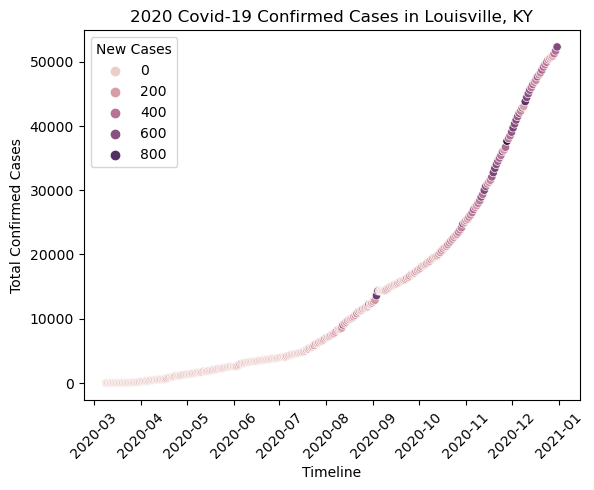

In [880]:
# Create neater data for visualizing 2020 covid data alone
start_date = '2020-01-01'
end_date = '2020-12-31'
dated_df = combined[(combined['date']>= start_date) & (combined['date']<= end_date)]

# Visualize the progression of confirmed covid cases throughout 2020.
sns.scatterplot(data= dated_df, x= 'date', y='cumulative_confirmed', hue='new_confirmed')
plt.xticks(rotation=45)
plt.xlabel('Timeline')
plt.ylabel('Total Confirmed Cases')
plt.legend(title= 'New Cases')
plt.title('2020 Covid-19 Confirmed Cases in Louisville, KY')

- This figure is simply charting the progression of new confirmed cases in the city over 12 months. The hue of the plot points allows us to see which months recorded more newly infected individuals.

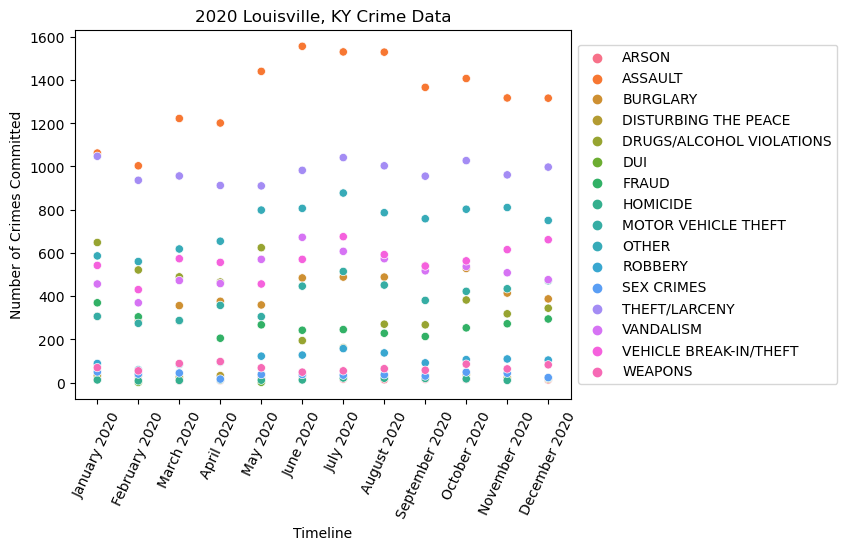

In [881]:
# Crime data for Louisville, KY in 2020

# Use seaborn with pivot_table
pivot_table.reset_index(inplace=True)
melted_table = pd.melt(pivot_table, id_vars='crime', var_name='month_year', value_name='crime_totals')

sns.scatterplot(data= melted_table, hue='crime', y='crime_totals', x='month_year')
plt.ylabel('Number of Crimes Committed')
plt.xlabel('Timeline')
plt.xticks(rotation=65)
plt.title('2020 Louisville, KY Crime Data')
# This places the legend the side of the figure so that it doesn't obscure it by default.
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


##### - The above scatterplot is showing us the number of crimes committed per month in 2020. You'll notice that each month has an assortment of colors being represented. These are different types of crimes being commited and they can be seen in the pivot table that I created earlier. I intended for this figure to provide crime data at a glance to show you how the crime numbers changed throughout the year.

# Insights

- Looking at the figures generated and the data tables gives us some information, though I wouldn't say it's definitive without further, more in depth, analysis. For instance, look at the progression of confirmed covid cases in Louisville. We can see that it didn't really take off until September. Meanwhile, crime seemed to increased across all crime types between April and May. Louisville went into 'lockdown' in mid-March and that lasted until early May until restrictions began to slowly ease up throughout the rest of spring/summer. You can actually see an initial dip in major crime types in that March to April timeframe. However, that was short-lived despite new Covid restrictions being implemented.

- I was actually expecting to see a negative correlation with the data presented. I figured that if fewer people were out in public, then there would be fewer crimes committed. Strictly, looking at the time, it seems crime is more affected by time of year and, potentially, weather conditions. You'll noticed that most crimes had either an uptick or sustained high occurrences in the warmer months. They began to decrease when going into the cooler months. It would actually be interesting to compare the potential effects of weather on criminal behavior.

- Certain crimes were likely to be committed, but the data does not fully support the notion that Covid had an appreciable effect on their frequency. From the beginning of the year until the end assault was commited more than any other crime in the city. One could make an argument for assault having been affected the by the pandemic. The public was in a tense and uncertain situation. Masks were being mandated, people weren't able to gather as easily for social events, and travel was impeded as we were trying to navigate ourselves through these stressful times.